# "Unpivoting" a dataframe
---

## **Excel:**

*   Pivot table wizard (Alt -> D -> P)

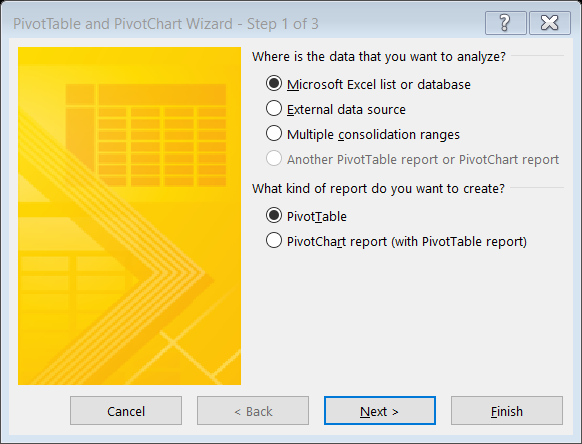

## **Python:**



*   Uses pd.melt() 


    pd.melt(df
           , id_vars='id_column'
           , var_name='new_column_name(s)'
           , value_name='new_value_name'
           , ignore_index=False               # Keeps the index
           )

OR 

    df.melt()



<br>

<br>

### Load required packages and data
---

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Save Github location paths to a variable
census_path = 'https://github.com/The-Calculated-Life/python_analysis_for_excel/blob/main/data/census_data.xlsx?raw=true'

# Read excel and CSV files
census = pd.read_excel(census_path)

from vega_datasets import data
cars = data.cars()
cars['Year'] = cars['Year'].dt.year

# Load pivots
cars_pivot = cars.pivot_table(index='Year'
                              , columns='Cylinders'
                              , values='Miles_per_Gallon'
                              , aggfunc=np.mean
                              , margins=True
                              )

census_pivot = census.pivot_table(index='state'
                                  , columns=['sex', 'firmsize']
                                  , values='avg_employee_earnings'
                                  , aggfunc=np.mean
                                  )

sales_pivot = pd.DataFrame({'Year': {0: 2018, 1: 2019, 2: 2020},
                          'Jan': {0: 1000, 1: 3000, 2: 5000},
                          'Feb': {0: 2000, 1: 4000, 2: 6000},
                          'Mar': {0: 3000, 1: 5000, 2: 7000}
                           })

<br>

# Reverse a pivot
---

In [3]:
# Preview cars_pivot: values are average miles per gallon
cars_pivot.head()

Cylinders,3,4,5,6,8,All
Year,,,,,,
1970,NaN,25.285714,NaN,20.500000,14.111111,17.689655
1971,NaN,27.461538,NaN,18.000000,13.428571,21.250000
1972,19.0,23.428571,NaN,NaN,13.615385,18.714286
1973,18.0,22.727273,NaN,19.000000,13.200000,17.100000
1974,NaN,27.800000,NaN,17.857143,14.200000,22.703704


<br>

In [4]:
# Melt cars_pivot dataframe (no arguments)
cars_pivot.melt()

,Cylinders,value
0,3,NaN
1,3,NaN
2,3,19.000000
3,3,18.000000
4,3,NaN
...,...,...
73,All,24.061111
74,All,25.093103
75,All,33.696552
76,All,31.045000


<br>

In [5]:
# Melt cars_pivot dataframe (add value_name)
cars_pivot.melt(value_name='MPG')

,Cylinders,MPG
0,3,NaN
1,3,NaN
2,3,19.000000
3,3,18.000000
4,3,NaN
...,...,...
73,All,24.061111
74,All,25.093103
75,All,33.696552
76,All,31.045000


<br>

In [6]:
# Melt cars_pivot dataframe (include index) 
cars_pivot.melt(value_name='MPG', ignore_index=False)

,Cylinders,MPG
Year,,
1970,3,NaN
1971,3,NaN
1972,3,19.000000
1973,3,18.000000
1974,3,NaN
...,...,...
1978,All,24.061111
1979,All,25.093103
1980,All,33.696552


<br>

<br>

### Example: Melt table without an index
---

In [7]:
# View sales_pivot
sales_pivot

,Year,Jan,Feb,Mar
0,2018,1000,2000,3000
1,2019,3000,4000,5000
2,2020,5000,6000,7000


<br>

In [8]:
# Unpivot the sales_pivot (no arguments)
sales_pivot.melt()

,variable,value
0,Year,2018
1,Year,2019
2,Year,2020
3,Jan,1000
4,Jan,3000
5,Jan,5000
6,Feb,2000
7,Feb,4000
8,Feb,6000
9,Mar,3000


<br>

In [10]:
# Unpivot the sales_pivot
sales_pivot.melt(id_vars='Year'
                , var_name='Month'
                , value_name='Sales')

,Year,Month,Sales
0,2018,Jan,1000
1,2019,Jan,3000
2,2020,Jan,5000
3,2018,Feb,2000
4,2019,Feb,4000
5,2020,Feb,6000
6,2018,Mar,3000
7,2019,Mar,5000
8,2020,Mar,7000


<br><br>
##### **QUICK CHALLENGE #1: Unpivoting a dataframe**

For your task, I have provided weekly sales data from Singapore University of Social Sciences below. It includes over 800 products (`Product_Code`) and a column for each week, indluding a normalized version

**Task:**

*   Use the `weekly_sales` dataframe provided below to unpivot the data
*   The final result should look like the following


      Product_Code	Week	Quantity Sold
    	P1	           W0	       11.00
    	P2	           W0	        7.00
    	P3	           W0 	       7.00
    	P4	           W0	       12.00
    	P5	           W0	        8.00

<br>


In [11]:
# Load and view the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv'
weekly_sales = pd.read_csv(url)

weekly_sales.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,...,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,...,0.72,0.33,0.33,0.33,0.61,0.33,0.00,0.50,0.11,0.44,0.22,0.50,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.50,0.17,0.11,0.61,0.39,0.33,0.50,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,...,0.60,0.20,0.00,0.60,0.20,0.70,0.70,0.90,0.40,0.70,0.20,0.40,0.50,0.30,0.50,0.80,0.50,0.50,0.30,0.10,0.30,0.20,0.30,1.00,0.50,0.20,0.70,0.30,0.20,0.50,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,...,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.00,0.18,0.00,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.00,0.18,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,...,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.00,0.24,0.29,0.00,0.18,0.59,0.18,1.00,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,...,0.33,0.07,0.67,0.33,0.47,0.80,0.20,0.67,0.53,0.20,0.47,0.40,0.33,0.60,0.33,0.40,0.67,0.00,0.13,0.00,0.13,0.13,0.40,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


<br>

In [12]:
# Your code for quick challenge #1 here:
weekly_sales.melt(id_vars='Product_Code'
                  , var_name='Week'
                  , value_name='Quantity Sold')

,Product_Code,Week,Quantity Sold
0,P1,W0,11.00
1,P2,W0,7.00
2,P3,W0,7.00
3,P4,W0,12.00
4,P5,W0,8.00
...,...,...,...
85961,P815,Normalized 51,0.00
85962,P816,Normalized 51,0.71
85963,P817,Normalized 51,0.75
85964,P818,Normalized 51,0.00
